Using a Convolutional Neural Network (CNN), images of Homer and Bart can be classified by training the model to recognize each character's unique features. The CNN learns patterns  through layers that detect increasingly complex visual traits. After training, the model can accurately classify new images based on these learned features.

### Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.17.0'

Connecting with google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir /content/my_new_folder

### Loading the image

In [4]:
path='/content/my_new_folder/homer_bart_2.zip'
zip_object=zipfile.ZipFile(file=path,mode='r')
zip_object.extractall('./')
zip_object.close()

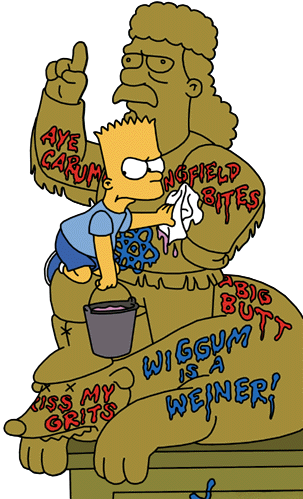

In [5]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart101.bmp')

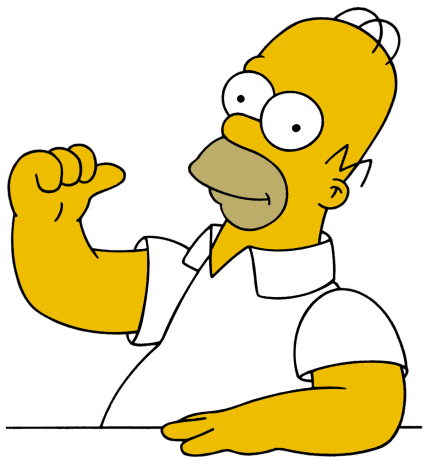

In [6]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/homer/homer102.bmp')

### Train and test set

In [7]:
training_generator=ImageDataGenerator(rescale=1./255,
                                      rotation_range=7,
                                      horizontal_flip=True,
                                      zoom_range=0.2)

In [10]:
train_dataset=training_generator.flow_from_directory('/content/homer_bart_2/training_set',
                                                     target_size=(64,64),
                                                     batch_size=8,
                                                     class_mode='categorical',
                                                     shuffle=True)

Found 215 images belonging to 2 classes.


In [11]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [12]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

Creating test dataset

In [13]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset=test_generator.flow_from_directory('/content/homer_bart_2/test_set',
                                               target_size=(64,64),
                                                batch_size=1,
                                                class_mode='categorical',
                                                shuffle=False
                                                )

Found 54 images belonging to 2 classes.


### Building and training the neural network

In [15]:
network=Sequential()
network.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))#convolution layer
network.add(MaxPool2D(pool_size=(2,2)))#max pooling layer
#Adding more convolution and max pooling layer
network.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))#convolution layer
network.add(MaxPool2D(pool_size=(2,2)))#max pooling layer
network.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))#convolution layer
network.add(MaxPool2D(pool_size=(2,2)))#max pooling layer

network.add(Flatten())#flattening layer where we convert a matrix to vector
#Adding dense layer
network.add(Dense(units=577,activation='relu'))#(1152+2)/2
network.add(Dense(units=577,activation='relu'))
network.add(Dense(units=2,activation='softmax'))
network.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 577)                 │         665,281 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 577)                 │         333,506 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,019,335 (3.89 MB)

 Trainable params: 1,019,335 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
network.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
#storing the results
history=network.fit(train_dataset,epochs=50)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.8414 - loss: 0.3168
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8866 - loss: 0.2383
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8897 - loss: 0.2554
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.8866 - loss: 0.2016
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9494 - loss: 0.1476
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.9362 - loss: 0.1423
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9571 - loss: 0.1196
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9723 - loss: 0.0532
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.9594 - loss: 0.0861
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9631 - loss: 0.1004
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.8945 - loss: 0.3471
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy:

Evaluating the neural network

In [21]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [22]:
predictions=network.predict(test_dataset)
predictions

22/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[1.0000000e+00, 2.1607995e-28],
       [1.0000000e+00, 7.5230131e-16],
       [6.2748673e-04, 9.9937254e-01],
       [1.0000000e+00, 1.3194219e-25],
       [1.0000000e+00, 2.4002623e-26],
       [1.0000000e+00, 2.7947162e-27],
       [1.0000000e+00, 1.3721301e-15],
       [9.9569029e-01, 4.3096882e-03],
       [9.9990022e-01, 9.9720317e-05],
       [9.9999106e-01, 8.9755840e-06],
       [9.9999964e-01, 3.0423573e-07],
       [1.0000000e+00, 6.1403491e-20],
       [9.9999809e-01, 1.8695681e-06],
       [9.9999428e-01, 5.6814383e-06],
       [9.9999988e-01, 1.5843356e-07],
       [1.0000000e+00, 5.2036067e-32],
       [8.5277051e-01, 1.4722946e-01],
       [9.9999797e-01, 1.9689874e-06],
       [1.0000000e+00, 1.4575902e-09],
       [1.0000000e+00, 5.8063760e-23],
       [9.9999988e-01, 7.9143049e-08],
       [1.0000000e+00, 3.0103776e-16],
       [1.0000000e+00, 2.7088948e-10],
       [9.8396319e-01, 1.6036782e-02],
       [1.0000000e+00, 2.7345828e-20],
       [9.9999952e-01, 4.

In [23]:
predictions=np.argmax(predictions,axis=1)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [25]:
test_dataset.classes
#compainring both the prediction and expected output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

To calculate accuracy

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes,predictions)

0.8888888888888888

which is a good accuracy score compared to other methods

Cnfusion matrix

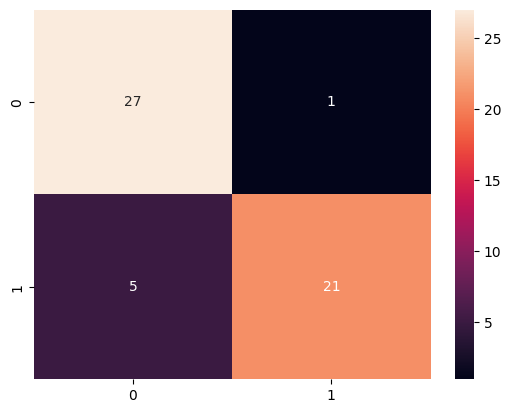

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_dataset.classes,predictions)
sns.heatmap(cm,annot=True);

Calculating precision and recall

In [28]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        28
           1       0.95      0.81      0.88        26

    accuracy                           0.89        54
   macro avg       0.90      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54



### Saving and loading the model

In [31]:
#saving in json format
model_json=network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)


In [32]:

from keras.models import save_model
save_model(network,'/content/weights.hdf5')

In [33]:

with open('network.json') as json_file:
  json_save_model=json_file.read()
json_save_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_1", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "name": "input_layer_1"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_3", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.ini

In [36]:
# Load the model architecture from JSON
network_loaded = tf.keras.models.model_from_json(json_save_model)

# Load weights into the model
network_loaded.load_weights('weights.hdf5')

# Compile the loaded model
network_loaded.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)


In [37]:
network_loaded.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 577)                 │         665,281 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 577)                 │         333,506 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,019,335 (3.89 MB)

 Trainable params: 1,019,335 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

### Classifying one single image

In [38]:
image=cv2.imread('/content/homer_bart_2/test_set/homer/homer15.bmp')

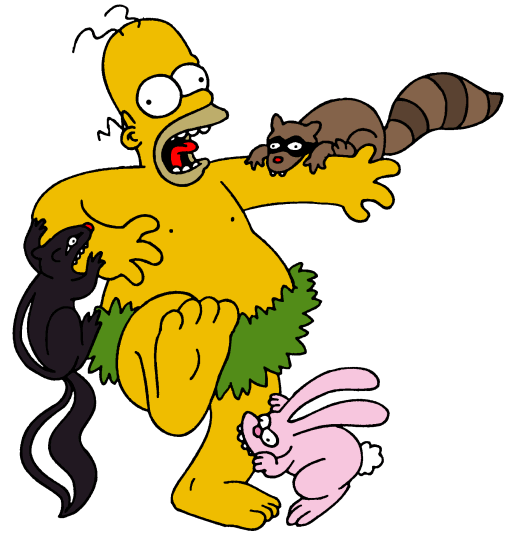

In [40]:
cv2_imshow(image)

In [41]:
image.shape

(536, 514, 3)

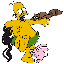

In [42]:
#reshape the image
image=cv2.resize(image,(64,64))
cv2_imshow(image)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
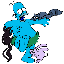

In [43]:
image

In [44]:
image=image/255
image

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [45]:
image.shape

(64, 64, 3)

In [46]:
#reshape to batch format
image=image.reshape(-1,64,64,3)
image.shape

(1, 64, 64, 3)

In [47]:
result=network_loaded.predict(image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


array([[5.2211502e-11, 1.0000000e+00]], dtype=float32)

In [48]:
result=np.argmax(result)
result

1

In [49]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [50]:
if result==0:
  print('Bart')
else:
  print('Homer')

Homer


So it predicted the image correctly as Homer